# LOAN PREDICTION

In [1]:
!pip3 install imblearn

In [2]:
#IMPORTING NEEDED LIBRARIES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [3]:
df=pd.read_csv(r'Loan_Application.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [6]:
df.shape

(614, 13)

In [7]:
df.sample()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
356,LP002149,Male,Yes,2,Graduate,No,8333,3167.0,165.0,360.0,1.0,Rural,Y


# EDA (EXPLORATORY DATA ANALYSIS)

In [8]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:>

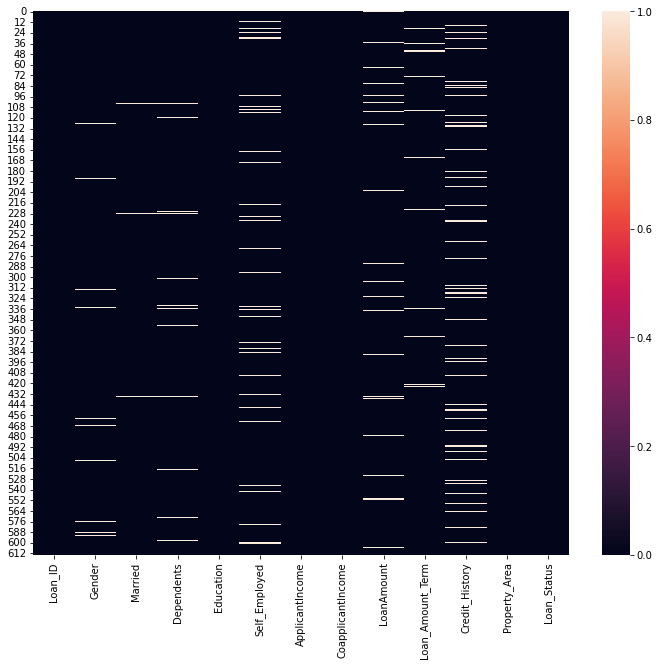

In [9]:
plt.figure(figsize=(12,10))
sns.heatmap(df.isnull())

In [10]:
df['Gender'].value_counts() # can be filled with mode

Male      489
Female    112
Name: Gender, dtype: int64

In [11]:
df['Married'].value_counts() # can be filled with mode

Yes    398
No     213
Name: Married, dtype: int64

In [12]:
df[df['Married'].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
104,LP001357,Male,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
228,LP001760,Male,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
435,LP002393,Female,NaN,NaN,Graduate,No,10047,0.0,NaN,240.0,1.0,Semiurban,Y


In [13]:
df['Dependents'].value_counts() #fill nan with mode

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [14]:
df['Self_Employed'].value_counts() # fill nan values with mode

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [15]:
df['LoanAmount'].value_counts() # fill nan with mean

120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: LoanAmount, Length: 203, dtype: int64

In [16]:
df['Loan_Amount_Term'].value_counts() # fill nan values with mean

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [17]:
np.mean(df['Loan_Amount_Term'])

342.0

In [18]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [19]:
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)
df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [20]:
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(np.mean(df['Loan_Amount_Term']))
df['LoanAmount']=df['LoanAmount'].fillna(np.mean(df['LoanAmount']))
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


<AxesSubplot:>

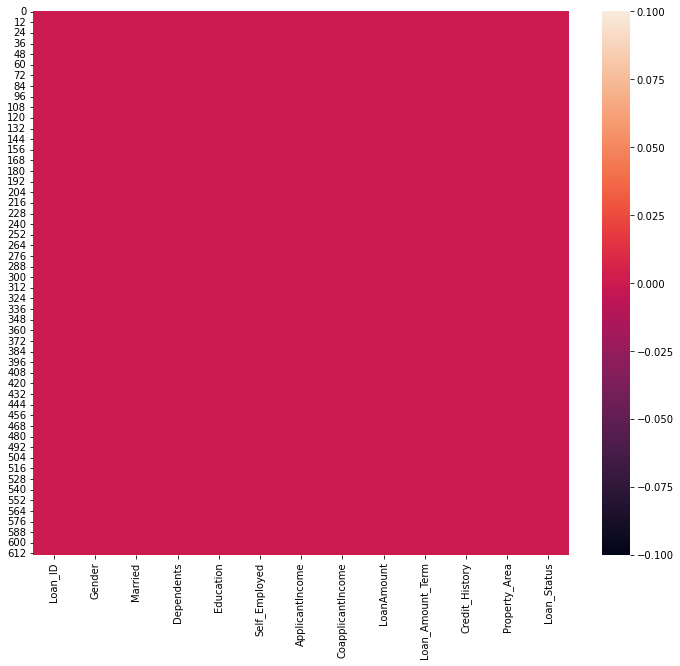

In [21]:
plt.figure(figsize=(12,10))
sns.heatmap(df.isnull())

ALL NULL VALUES FILLED

In [22]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.855049
std,6109.041673,2926.248369,84.037468,64.372489,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


SKEWNESS PRESENT AND DEVIATION SEEN IN SOME COLUMNS

<AxesSubplot:title={'center':'Credit_History'}, xlabel='Credit_History', ylabel='count'>

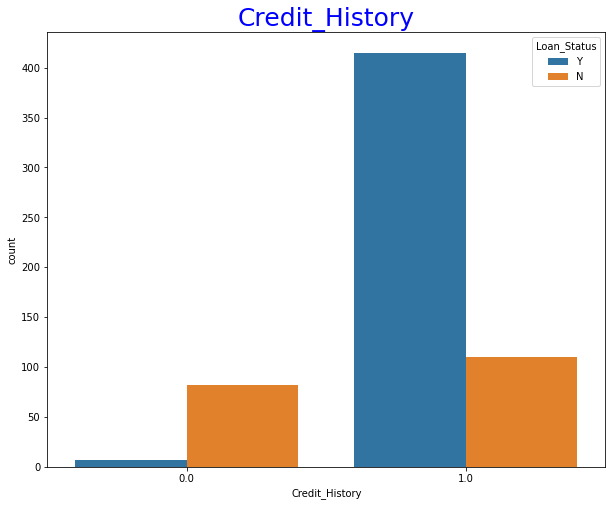

In [23]:
plt.figure(figsize=(10,8))

plt.title("Credit_History",fontsize= 25,
        fontweight =200,
        color = 'blue',)

sns.countplot(data=df,x='Credit_History',hue='Loan_Status')


<AxesSubplot:title={'center':'Education'}, xlabel='Education', ylabel='count'>

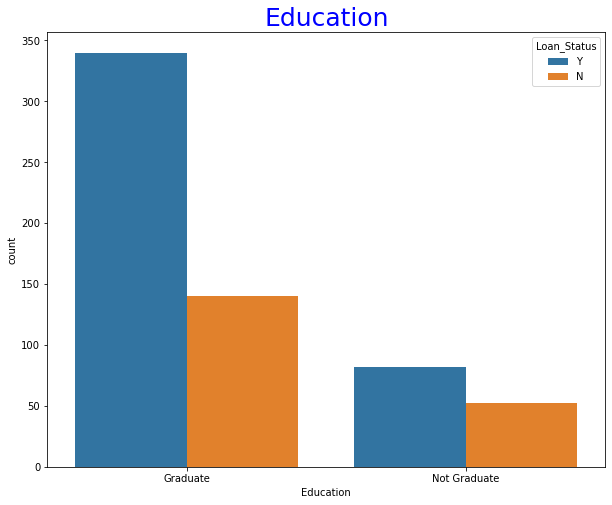

In [24]:
plt.figure(figsize=(10,8))

plt.title("Education",fontsize= 25,
        fontweight =200,
        color = 'blue',)

sns.countplot(data=df,x='Education',hue='Loan_Status')


<AxesSubplot:title={'center':'Self_Employed loan status'}, xlabel='Self_Employed', ylabel='count'>

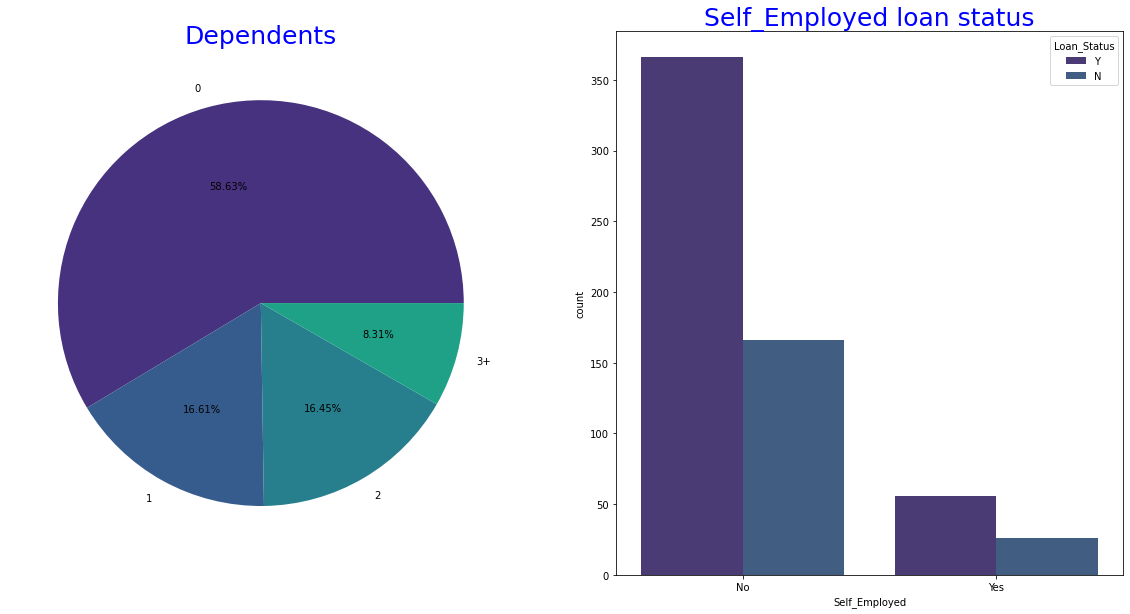

In [25]:
plt.figure(figsize=(20,10))


colors=sns.color_palette('viridis')
labels=df['Dependents'].dropna().unique()

plt.subplot(1,2,1)

plt.title('Dependents',fontsize= 25,
        fontweight =200,
        color = 'blue')
plt.pie(df['Dependents'].value_counts(), 
        labels=labels, 
        colors=colors, 
        autopct='%.2f%%')


plt.subplot(1,2,2)

plt.title('Self_Employed loan status',fontsize= 25,
        fontweight =200,
        color = 'blue',)



sns.countplot(x="Self_Employed", data=df, palette=colors,hue='Loan_Status')

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Count'>

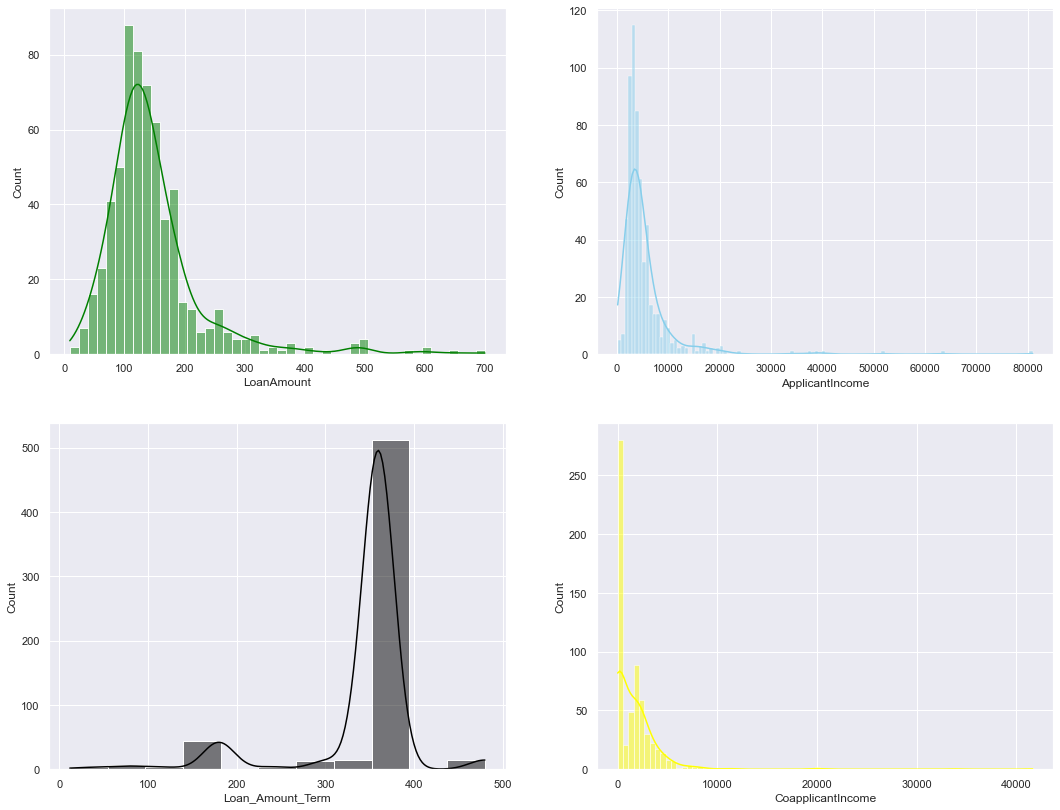

In [26]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(18, 14))

sns.histplot(data=df, x="LoanAmount", kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=df, x="ApplicantIncome", kde=True, ax=axs[0, 1], color='skyblue')
sns.histplot(data=df, x="Loan_Amount_Term", kde=True, ax=axs[1, 0], color='black')
sns.histplot(data=df, x="CoapplicantIncome", kde=True, ax=axs[1, 1] ,color='yellow')

<AxesSubplot:title={'center':'Loan status'}, xlabel='Married', ylabel='count'>

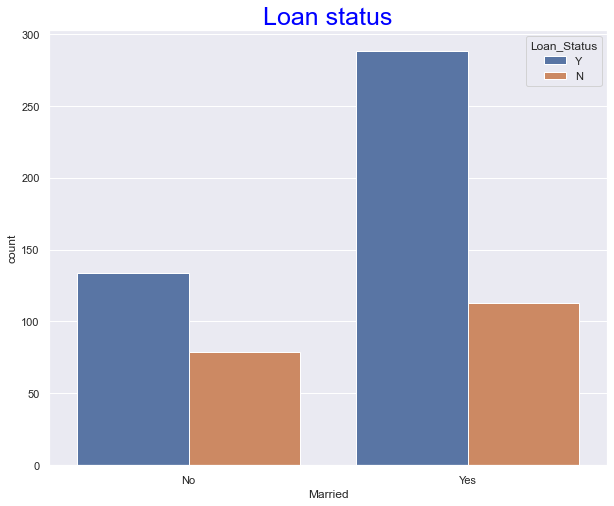

In [27]:
plt.figure(figsize=(10,8))

plt.title("Loan status",fontsize= 25,
        fontweight =200,
        color = 'blue',)

sns.countplot(data=df,x='Married',hue='Loan_Status')


# Handling Categorical Data

One can find many ways to handle categorical data. Some of them categorical data are,

Nominal data --> data are not in any order --> OneHotEncoder is used in this case

Ordinal data --> data are in order --> LabelEncoder is used in this case

In [28]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [29]:
# As BELOW ARE Nominal Categorical data we will perform OneHotEncoding

Married = df[["Married"]]
Education = df[["Education"]]
Self_Employed = df[["Self_Employed"]]



Married = pd.get_dummies(Married, drop_first= True)
Education = pd.get_dummies(Education, drop_first= True)
Self_Employed = pd.get_dummies(Self_Employed, drop_first= True)


In [30]:
# Concatenate dataframe --> train_data + Airline + Source + Destination

df = pd.concat([df, Married, Education,Self_Employed], axis = 1)

In [31]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Married_Yes,Education_Not Graduate,Self_Employed_Yes
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,0,0,0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,1,0,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,1,0,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,1,1,0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,0,0,0


# Label Encoding 


In [32]:
# APLLYING LABEL ENCODER TO REST AS THEY ARE ORDINAL DATA

from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

In [33]:
df['Dependents'] = LE.fit_transform(df['Dependents'])
df['Loan_Status'] = LE.fit_transform(df['Loan_Status'])
df['Property_Area'] = LE.fit_transform(df['Property_Area'])


In [34]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Married_Yes,Education_Not Graduate,Self_Employed_Yes
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,2,1,0,0,0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,0,0,1,0,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,2,1,1,0,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,2,1,1,1,0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,2,1,0,0,0


In [35]:
df.drop(["Loan_ID","Gender", "Married", "Education","Self_Employed"], axis = 1, inplace = True)
df.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Married_Yes,Education_Not Graduate,Self_Employed_Yes
0,0,5849,0.0,146.412162,360.0,1.0,2,1,0,0,0
1,1,4583,1508.0,128.000000,360.0,1.0,0,0,1,0,0
2,0,3000,0.0,66.000000,360.0,1.0,2,1,1,0,1
3,0,2583,2358.0,120.000000,360.0,1.0,2,1,1,1,0
4,0,6000,0.0,141.000000,360.0,1.0,2,1,0,0,0


# CORRELATION

In [36]:
df.corr()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Married_Yes,Education_Not Graduate,Self_Employed_Yes
Dependents,1.000000,0.118202,0.030430,0.163106,-0.101054,-0.040160,-0.000244,0.010118,0.334216,0.055752,0.056798
ApplicantIncome,0.118202,1.000000,-0.116605,0.565620,-0.045242,-0.018615,-0.009500,-0.004710,0.051708,-0.140760,0.127180
CoapplicantIncome,0.030430,-0.116605,1.000000,0.187828,-0.059675,0.011134,0.010522,-0.059187,0.075948,-0.062290,-0.016100
LoanAmount,0.163106,0.565620,0.187828,1.000000,0.038801,-0.001431,-0.044776,-0.036416,0.147141,-0.166998,0.115260
Loan_Amount_Term,-0.101054,-0.045242,-0.059675,0.038801,1.000000,0.000432,-0.077620,-0.020974,-0.100863,-0.077242,-0.033943
Credit_History,-0.040160,-0.018615,0.011134,-0.001431,0.000432,1.000000,0.001963,0.540556,0.010938,-0.073658,-0.001550
Property_Area,-0.000244,-0.009500,0.010522,-0.044776,-0.077620,0.001963,1.000000,0.032112,0.004257,-0.065243,-0.030860
Loan_Status,0.010118,-0.004710,-0.059187,-0.036416,-0.020974,0.540556,0.032112,1.000000,0.091478,-0.085884,-0.003700
Married_Yes,0.334216,0.051708,0.075948,0.147141,-0.100863,0.010938,0.004257,0.091478,1.000000,0.012304,0.004489
Education_Not Graduate,0.055752,-0.140760,-0.062290,-0.166998,-0.077242,-0.073658,-0.065243,-0.085884,0.012304,1.000000,-0.010383


<AxesSubplot:>

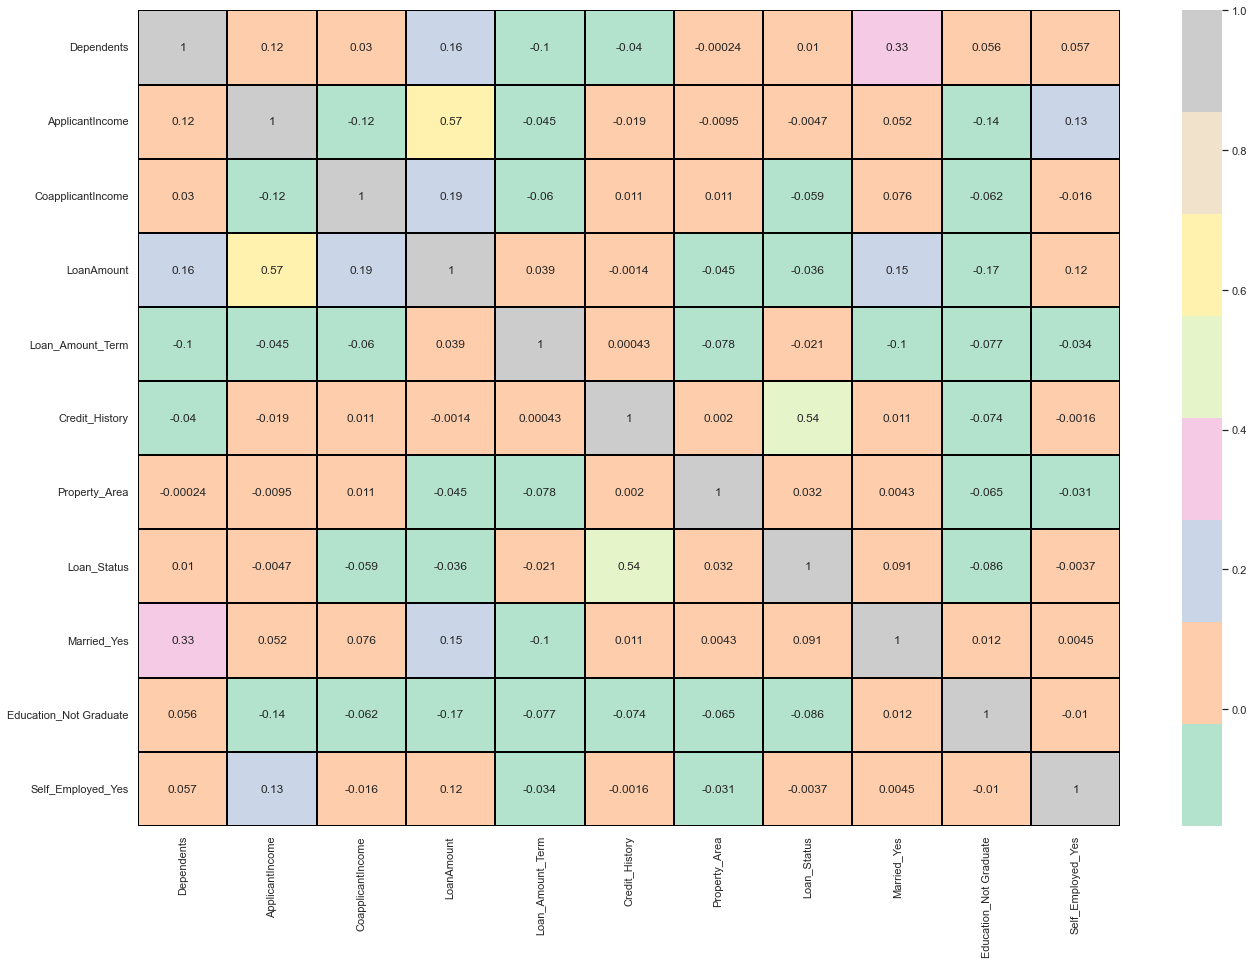

In [37]:
plt.figure(figsize=(22,15))
sns.heatmap(df.corr(),cmap='Pastel2',annot=True,linecolor='Black',linewidths=.2)

LOAN AMOUNT AND APPLICANT INCOME ARE CORRELATED

CREDIT HISTORY AND LOAN STATUS ARE ALSO HIGH CORRELATED



# CHECKING OUTLIERS

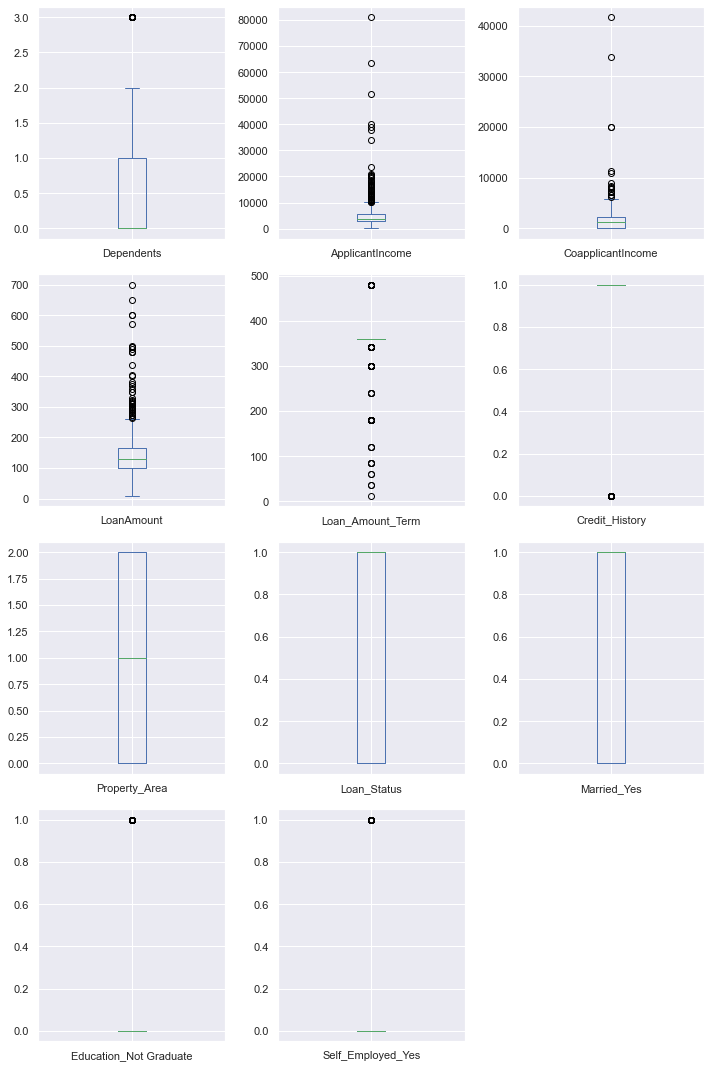

In [38]:
df.plot(kind='box',subplots=True,layout=(4,3),figsize=(10,15))
plt.tight_layout()


OUTLIERS ARE PRESENT HENCE REMOVING IT

# Removing Outliers

by zscore

In [39]:
from scipy.stats import zscore

z=np.abs(zscore(df))
z

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Married_Yes,Education_Not Graduate,Self_Employed_Yes
0,0.737806,0.072991,0.554487,0.000000,0.279851,0.411733,1.223298,0.674519,1.372089,0.528362,0.392601
1,0.253470,0.134412,0.038732,0.219273,0.279851,0.411733,1.318513,1.482537,0.728816,0.528362,0.392601
2,0.737806,0.393747,0.554487,0.957641,0.279851,0.411733,1.223298,0.674519,0.728816,0.528362,2.547117
3,0.737806,0.462062,0.251980,0.314547,0.279851,0.411733,1.223298,0.674519,0.728816,1.892641,0.392601
4,0.737806,0.097728,0.554487,0.064454,0.279851,0.411733,1.223298,0.674519,1.372089,0.528362,0.392601
...,...,...,...,...,...,...,...,...,...,...,...
609,0.737806,0.410130,0.554487,0.898095,0.279851,0.411733,1.318513,0.674519,1.372089,0.528362,0.392601
610,2.236021,0.212557,0.554487,1.267279,2.518655,0.411733,1.318513,0.674519,0.728816,0.528362,0.392601
611,0.253470,0.437174,0.472404,1.269371,0.279851,0.411733,1.223298,0.674519,0.728816,0.528362,0.392601
612,1.244745,0.357064,0.554487,0.483367,0.279851,0.411733,1.223298,0.674519,0.728816,0.528362,0.392601


In [40]:
threshold=3
print(np.where(z>3))

(array([  9,  14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 177,
       183, 185, 242, 262, 278, 308, 313, 333, 333, 369, 402, 409, 417,
       432, 443, 487, 495, 497, 506, 523, 525, 546, 561, 575, 581, 585,
       600, 604]), array([2, 4, 4, 4, 1, 3, 4, 1, 3, 1, 3, 2, 3, 1, 1, 4, 4, 3, 3, 4, 1, 3,
       3, 2, 1, 2, 3, 1, 3, 4, 4, 3, 3, 3, 4, 3, 4, 2, 4, 2, 3]))


In [41]:
df1=df[(z<3).all(axis=1)]
df1


,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Married_Yes,Education_Not Graduate,Self_Employed_Yes
0,0,5849,0.0,146.412162,360.0,1.0,2,1,0,0,0
1,1,4583,1508.0,128.000000,360.0,1.0,0,0,1,0,0
2,0,3000,0.0,66.000000,360.0,1.0,2,1,1,0,1
3,0,2583,2358.0,120.000000,360.0,1.0,2,1,1,1,0
4,0,6000,0.0,141.000000,360.0,1.0,2,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
609,0,2900,0.0,71.000000,360.0,1.0,0,1,0,0,0
610,3,4106,0.0,40.000000,180.0,1.0,0,1,1,0,0
611,1,8072,240.0,253.000000,360.0,1.0,2,1,1,0,0
612,2,7583,0.0,187.000000,360.0,1.0,2,1,1,0,0


# Percentage loss

In [42]:
loss_percent=(614-577)/577*100
print(loss_percent,'%')

6.412478336221837 %


# Separating Dataset

In [43]:
#independent column
x=df1.drop(['Loan_Status'],axis=1)
#target
y=df1['Loan_Status']

In [44]:
x.shape

(577, 10)

In [45]:
y.shape

(577,)

# skewness check

In [46]:
df1.skew()

Dependents                1.052106
ApplicantIncome           2.148522
CoapplicantIncome         1.350517
LoanAmount                1.113132
Loan_Amount_Term         -2.077031
Credit_History           -1.976043
Property_Area            -0.055332
Loan_Status              -0.822635
Married_Yes              -0.630211
Education_Not Graduate    1.306588
Self_Employed_Yes         2.252848
dtype: float64

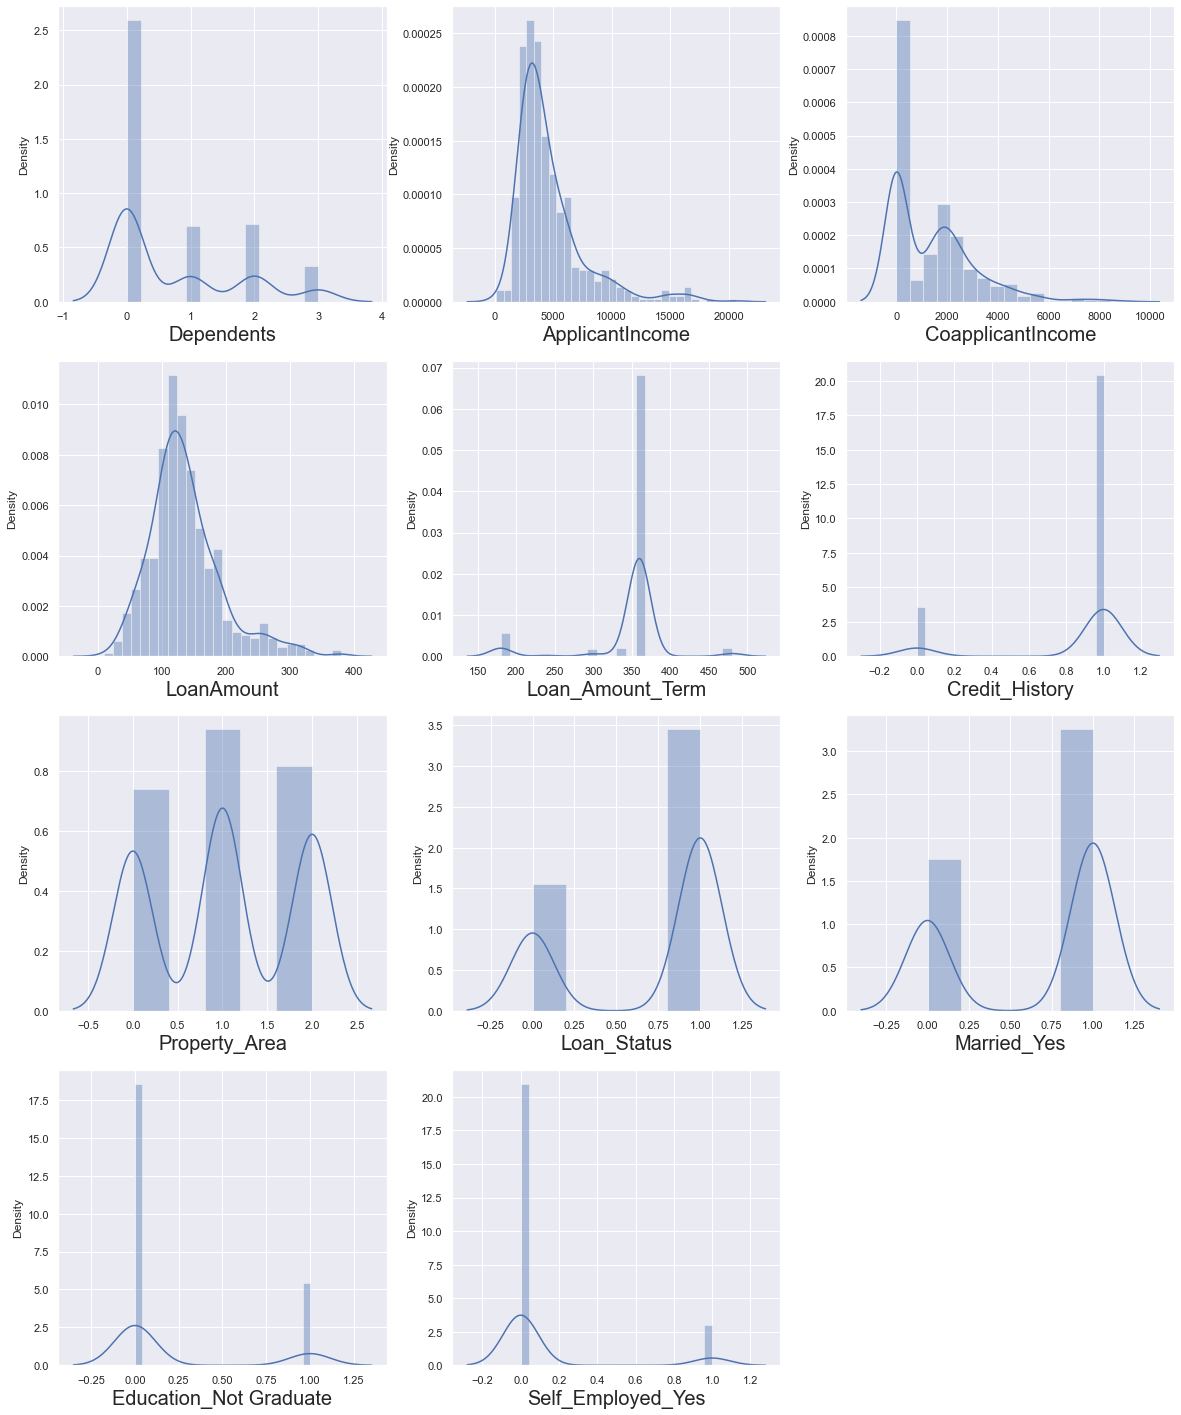

In [47]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in df.columns:
    if plotnumber<=11:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(df1[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

APPLICANT AND CO APPLICANT INCOME ARE HAVING SOME RIGHT SKEWNESS

LOAN AMOUNT SEEM TO BE NORMALLY DISTRIBUTED

REMOVING SKEWNESS


In [48]:
from sklearn.preprocessing import power_transform
df1=power_transform(x,method='yeo-johnson')
df1

array([[-0.80924269,  0.68177996, -1.12244561, ..., -1.36251079,
        -0.54196123, -0.38058018],
       [ 0.90286851,  0.23478308,  0.74411669, ...,  0.73393914,
        -0.54196123, -0.38058018],
       [-0.80924269, -0.5272005 , -1.12244561, ...,  0.73393914,
        -0.54196123,  2.62756724],
       ...,
       [ 0.90286851,  1.28165763,  0.17334443, ...,  0.73393914,
        -0.54196123, -0.38058018],
       [ 1.34467098,  1.16442577, -1.12244561, ...,  0.73393914,
        -0.54196123, -0.38058018],
       [-0.80924269,  0.23478308, -1.12244561, ..., -1.36251079,
        -0.54196123,  2.62756724]])

# Scaling

In [49]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-0.72331271,  0.39926641, -0.86103617, ..., -1.36251079,
        -0.54196123, -0.38058018],
       [ 0.2823534 , -0.02802029,  0.05284031, ...,  0.73393914,
        -0.54196123, -0.38058018],
       [-0.72331271, -0.56229742, -0.86103617, ...,  0.73393914,
        -0.54196123,  2.62756724],
       ...,
       [ 0.2823534 ,  1.14954946, -0.71559164, ...,  0.73393914,
        -0.54196123, -0.38058018],
       [ 1.28801951,  0.98450744, -0.86103617, ...,  0.73393914,
        -0.54196123, -0.38058018],
       [-0.72331271, -0.02802029, -0.86103617, ..., -1.36251079,
        -0.54196123,  2.62756724]])

# SMOTE FOR BALANCING DATA

In [50]:
#SMOTE(synthetic Minority over sampling technique)
#It's use for Balancing the dataset

from imblearn.over_sampling import SMOTE
sm=SMOTE()

x_train,y_train=sm.fit_resample(x,y)
y_train

0      1
1      0
2      1
3      1
4      1
      ..
791    0
792    0
793    0
794    0
795    0
Name: Loan_Status, Length: 796, dtype: int64

In [51]:
y_train.value_counts()

1    398
0    398
Name: Loan_Status, dtype: int64

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

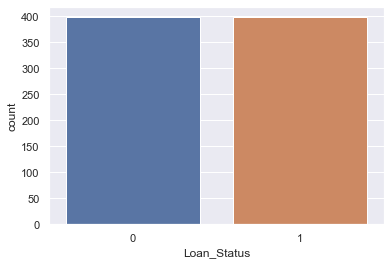

In [52]:
sns.countplot(y_train)

DATA IS NOW BALANCED

# Splitting the DataFrame

In [53]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=12)

# 1) LogisticRegression

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix

lo=LogisticRegression()
lo.fit(x_train,y_train)
lo.score(x_train,y_train)
predlo=lo.predict(x_test)

print('Accuracy Score is''\n',accuracy_score(y_test,predlo))
print('Confusion Matrix''\n',confusion_matrix(y_test,predlo))
print(classification_report(y_test,predlo))

Accuracy Score is
 0.905511811023622
Confusion Matrix
 [[19 11]
 [ 1 96]]
              precision    recall  f1-score   support

           0       0.95      0.63      0.76        30
           1       0.90      0.99      0.94        97

    accuracy                           0.91       127
   macro avg       0.92      0.81      0.85       127
weighted avg       0.91      0.91      0.90       127



### Cross Validation

In [55]:
test_accuracy= accuracy_score(y_test,predlo)

from sklearn.model_selection import cross_val_score
for i in range(2,10):
    cv_score=cross_val_score(lo,x,y,cv=i,n_jobs=2)
    cv_mean=cv_score.mean()
    print(f"At cross fold {i} the Cross Val score is {cv_mean*100} and Accuracy score is {test_accuracy*100}")

At cross fold 2 the Cross Val score is 80.93822087658593 and Accuracy score is 90.5511811023622
At cross fold 3 the Cross Val score is 81.45689407023605 and Accuracy score is 90.5511811023622
At cross fold 4 the Cross Val score is 81.10871647509579 and Accuracy score is 90.5511811023622
At cross fold 5 the Cross Val score is 81.63418290854572 and Accuracy score is 90.5511811023622
At cross fold 6 the Cross Val score is 81.62585910652922 and Accuracy score is 90.5511811023622
At cross fold 7 the Cross Val score is 81.64224843625372 and Accuracy score is 90.5511811023622
At cross fold 8 the Cross Val score is 81.62813926940639 and Accuracy score is 90.5511811023622
At cross fold 9 the Cross Val score is 81.6292735042735 and Accuracy score is 90.5511811023622


**LOGISTIC REGRESSION IS GIVING VERY GOOD ACCURACY SCORE BUT DIFFERENCE IS BIT HIGH**

###### TRYING OTHER MODELS


# 2) DecisionTreeClassifier

In [56]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
pred_dt=dt.predict(x_test)
print('Accuracy score''\n',accuracy_score(y_test,pred_dt))
print('Confusion Matrix''\n',confusion_matrix(y_test,pred_dt))
print('Classification Report''\n',classification_report(y_test,pred_dt))

Accuracy score
 0.7637795275590551
Confusion Matrix
 [[19 11]
 [19 78]]
Classification Report
               precision    recall  f1-score   support

           0       0.50      0.63      0.56        30
           1       0.88      0.80      0.84        97

    accuracy                           0.76       127
   macro avg       0.69      0.72      0.70       127
weighted avg       0.79      0.76      0.77       127



### Cross Validation

In [57]:
test_accuracy= accuracy_score(y_test,pred_dt)

from sklearn.model_selection import cross_val_score
for i in range(2,10):
    cv_score=cross_val_score(dt,x,y,cv=i)
    cv_mean=cv_score.mean()
    print(f"At cross fold {i} the Cross Val score is {cv_mean*100} and Accuracy score is {test_accuracy*100}")

At cross fold 2 the Cross Val score is 71.40282583621685 and Accuracy score is 76.37795275590551
At cross fold 3 the Cross Val score is 73.47977835348301 and Accuracy score is 76.37795275590551
At cross fold 4 the Cross Val score is 70.01676245210727 and Accuracy score is 76.37795275590551
At cross fold 5 the Cross Val score is 72.97001499250376 and Accuracy score is 76.37795275590551
At cross fold 6 the Cross Val score is 72.62134879725086 and Accuracy score is 76.37795275590551
At cross fold 7 the Cross Val score is 73.66399395491374 and Accuracy score is 76.37795275590551
At cross fold 8 the Cross Val score is 70.37195585996956 and Accuracy score is 76.37795275590551
At cross fold 9 the Cross Val score is 73.31196581196582 and Accuracy score is 76.37795275590551


**DecisionTreeClassifier IS FITTING WELL IN MODEL BUT LETS TRY OTHER MODEL FOR BETTER ACCURACY SCORE**


# 3) RandomForestClassifier

In [58]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
pred_rfc=rfc.predict(x_test)
print('Accuracy score''\n',accuracy_score(y_test,pred_rfc))
print('Confusion Matrix''\n',confusion_matrix(y_test,pred_rfc))
print('Classification Report''\n',classification_report(y_test,pred_rfc))

Accuracy score
 0.8582677165354331
Confusion Matrix
 [[20 10]
 [ 8 89]]
Classification Report
               precision    recall  f1-score   support

           0       0.71      0.67      0.69        30
           1       0.90      0.92      0.91        97

    accuracy                           0.86       127
   macro avg       0.81      0.79      0.80       127
weighted avg       0.86      0.86      0.86       127



### Cross Validation

In [59]:
test_accuracy= accuracy_score(y_test,pred_rfc)

from sklearn.model_selection import cross_val_score
for i in range(2,10):
    cv_score=cross_val_score(rfc,x,y,cv=i,n_jobs=2)
    cv_mean=cv_score.mean()
    print(f"At cross fold {i} the Cross Val score is {cv_mean*100} and Accuracy score is {test_accuracy*100}")

At cross fold 2 the Cross Val score is 78.85548827374087 and Accuracy score is 85.8267716535433
At cross fold 3 the Cross Val score is 80.58703943580886 and Accuracy score is 85.8267716535433
At cross fold 4 the Cross Val score is 79.54741379310344 and Accuracy score is 85.8267716535433
At cross fold 5 the Cross Val score is 79.38380809595202 and Accuracy score is 85.8267716535433
At cross fold 6 the Cross Val score is 80.0651489117984 and Accuracy score is 85.8267716535433
At cross fold 7 the Cross Val score is 78.69526888039965 and Accuracy score is 85.8267716535433
At cross fold 8 the Cross Val score is 80.4152397260274 and Accuracy score is 85.8267716535433
At cross fold 9 the Cross Val score is 79.20673076923077 and Accuracy score is 85.8267716535433


**RandomForestClassifier is giving good accuracy score but less cv score,lets try other model**


# 4) SUPPORT VECTOR CLASSIFIER

In [60]:
from sklearn.svm import SVC

svc=SVC()
svc.fit(x_train,y_train)
pred_svc=svc.predict(x_test)
print('Accuracy score''\n',accuracy_score(y_test,pred_svc))
print('Confusion Matrix''\n',confusion_matrix(y_test,pred_svc))
print('Classification Report''\n',classification_report(y_test,pred_svc))

Accuracy score
 0.8976377952755905
Confusion Matrix
 [[19 11]
 [ 2 95]]
Classification Report
               precision    recall  f1-score   support

           0       0.90      0.63      0.75        30
           1       0.90      0.98      0.94        97

    accuracy                           0.90       127
   macro avg       0.90      0.81      0.84       127
weighted avg       0.90      0.90      0.89       127



### Cross Validation

In [61]:
test_accuracy= accuracy_score(y_test,pred_svc)

from sklearn.model_selection import cross_val_score
for i in range(2,10):
    cv_score=cross_val_score(svc,x,y,cv=i,n_jobs=2)
    cv_mean=cv_score.mean()
    print(f"At cross fold {i} the Cross Val score is {cv_mean*100} and Accuracy score is {test_accuracy*100}")

At cross fold 2 the Cross Val score is 81.45845347943099 and Accuracy score is 89.76377952755905
At cross fold 3 the Cross Val score is 81.97592832469775 and Accuracy score is 89.76377952755905
At cross fold 4 the Cross Val score is 81.10991379310344 and Accuracy score is 89.76377952755905
At cross fold 5 the Cross Val score is 80.42128935532233 and Accuracy score is 89.76377952755905
At cross fold 6 the Cross Val score is 81.6258591065292 and Accuracy score is 89.76377952755905
At cross fold 7 the Cross Val score is 80.7753662734562 and Accuracy score is 89.76377952755905
At cross fold 8 the Cross Val score is 81.80412861491628 and Accuracy score is 89.76377952755905
At cross fold 9 the Cross Val score is 81.45833333333333 and Accuracy score is 89.76377952755905


**supportvector classifier is giving good accuracy score lets try other model**

# 5) GradientBoostingClassifier

In [62]:

# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

gbk = GradientBoostingClassifier()
gbk.fit(x_train, y_train)
pred_gbk = gbk.predict(x_test)
print('Accuracy score''\n',accuracy_score(pred_gbk,y_test))
print('Confusion Matrix''\n',confusion_matrix(y_test,pred_gbk))
print('Classification Report''\n',classification_report(y_test,pred_gbk))


Accuracy score
 0.8740157480314961
Confusion Matrix
 [[19 11]
 [ 5 92]]
Classification Report
               precision    recall  f1-score   support

           0       0.79      0.63      0.70        30
           1       0.89      0.95      0.92        97

    accuracy                           0.87       127
   macro avg       0.84      0.79      0.81       127
weighted avg       0.87      0.87      0.87       127



### Cross Validation

In [63]:
test_accuracy= accuracy_score(y_test,pred_gbk)

from sklearn.model_selection import cross_val_score
for i in range(2,10):
    cv_score=cross_val_score(gbk,x,y,cv=i,n_jobs=2)
    cv_mean=cv_score.mean()
    print(f"At cross fold {i} the Cross Val score is {cv_mean*100} and Accuracy score is {test_accuracy*100}")

At cross fold 2 the Cross Val score is 77.81682525951557 and Accuracy score is 87.4015748031496
At cross fold 3 the Cross Val score is 78.85722510074841 and Accuracy score is 87.4015748031496
At cross fold 4 the Cross Val score is 78.85895593869732 and Accuracy score is 87.4015748031496
At cross fold 5 the Cross Val score is 79.2143928035982 and Accuracy score is 87.4015748031496
At cross fold 6 the Cross Val score is 79.54610538373424 and Accuracy score is 87.4015748031496
At cross fold 7 the Cross Val score is 78.7078628101255 and Accuracy score is 87.4015748031496
At cross fold 8 the Cross Val score is 79.2023401826484 and Accuracy score is 87.4015748031496
At cross fold 9 the Cross Val score is 79.73023504273505 and Accuracy score is 87.4015748031496


**GradientBoostingClassifier is giving good accuracy score lets try other model also**

# 6) ExtraTreesClassifier

In [64]:
from sklearn.ensemble import ExtraTreesClassifier

ETC=ExtraTreesClassifier()
ETC.fit(x_train,y_train)
pred_ETC=ETC.predict(x_test)
print('Accuracy score''\n',accuracy_score(y_test,pred_ETC))
print('Confusion Matrix''\n',confusion_matrix(y_test,pred_ETC))
print('Classification Report''\n',classification_report(y_test,pred_ETC))


Accuracy score
 0.8110236220472441
Confusion Matrix
 [[20 10]
 [14 83]]
Classification Report
               precision    recall  f1-score   support

           0       0.59      0.67      0.62        30
           1       0.89      0.86      0.87        97

    accuracy                           0.81       127
   macro avg       0.74      0.76      0.75       127
weighted avg       0.82      0.81      0.81       127



### Cross Validation

In [65]:
test_accuracy= accuracy_score(y_test,pred_ETC)

from sklearn.model_selection import cross_val_score
for i in range(2,10):
    cv_score=cross_val_score(ETC,x,y,cv=i,n_jobs=3)
    cv_mean=cv_score.mean()
    print(f"At cross fold {i} the Cross Val score is {cv_mean*100} and Accuracy score is {test_accuracy*100}")

At cross fold 2 the Cross Val score is 78.16284602076125 and Accuracy score is 81.10236220472441
At cross fold 3 the Cross Val score is 79.20264824409902 and Accuracy score is 81.10236220472441
At cross fold 4 the Cross Val score is 77.46527777777779 and Accuracy score is 81.10236220472441
At cross fold 5 the Cross Val score is 77.12293853073463 and Accuracy score is 81.10236220472441
At cross fold 6 the Cross Val score is 79.0252720504009 and Accuracy score is 81.10236220472441
At cross fold 7 the Cross Val score is 77.99840476890138 and Accuracy score is 81.10236220472441
At cross fold 8 the Cross Val score is 77.29975266362253 and Accuracy score is 81.10236220472441
At cross fold 9 the Cross Val score is 77.99145299145299 and Accuracy score is 81.10236220472441


**ExtraTreesClassifier is giving good accuracy score and fit in model perfectly lets try other model**


# 7) KNeighborsClassifier


In [66]:
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier

knc=KNeighborsClassifier()
knc.fit(x_train,y_train)
pred_knc=knc.predict(x_test)
print('Accuracy score''\n',accuracy_score(y_test,pred_knc))
print('Confusion Matrix''\n',confusion_matrix(y_test,pred_knc))
print('Classification Report''\n',classification_report(y_test,pred_knc))

Accuracy score
 0.8740157480314961
Confusion Matrix
 [[19 11]
 [ 5 92]]
Classification Report
               precision    recall  f1-score   support

           0       0.79      0.63      0.70        30
           1       0.89      0.95      0.92        97

    accuracy                           0.87       127
   macro avg       0.84      0.79      0.81       127
weighted avg       0.87      0.87      0.87       127



### Cross Validation

In [67]:
test_accuracy= accuracy_score(y_test,pred_knc)

from sklearn.model_selection import cross_val_score
for i in range(2,10):
    cv_score=cross_val_score(knc,x,y,cv=i)
    cv_mean=cv_score.mean()
    print(f"At cross fold {i} the Cross Val score is {cv_mean*100} and Accuracy score is {test_accuracy*100}")

At cross fold 2 the Cross Val score is 79.55053344867359 and Accuracy score is 87.4015748031496
At cross fold 3 the Cross Val score is 79.89439407023605 and Accuracy score is 87.4015748031496
At cross fold 4 the Cross Val score is 78.16331417624521 and Accuracy score is 87.4015748031496
At cross fold 5 the Cross Val score is 78.33733133433283 and Accuracy score is 87.4015748031496
At cross fold 6 the Cross Val score is 78.33082760595647 and Accuracy score is 87.4015748031496
At cross fold 7 the Cross Val score is 77.12732462952856 and Accuracy score is 87.4015748031496
At cross fold 8 the Cross Val score is 77.98706240487063 and Accuracy score is 87.4015748031496
At cross fold 9 the Cross Val score is 77.98878205128204 and Accuracy score is 87.4015748031496


**KNeighborsClassifier is also giving good accuracy score but not fits model**


### hence best fitting model ExtraTreesClassifier and RandomForestClassifier are applied for hyperparameter

# Hyper parameter tuning

In [68]:
#ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV

#creating the parameter list to pass in GrideSearchcv
parameters={'max_features':['auto','sqrt','log2'],
           'max_depth':[4,5,6,7,8,9,10],
           'criterion':['gini','entropy']}

gcv=GridSearchCV(ExtraTreesClassifier(),parameters,cv=5,scoring="accuracy")
gcv.fit(x_train,y_train)
gcv.best_params_

{'criterion': 'entropy', 'max_depth': 7, 'max_features': 'auto'}

In [69]:
gcv_pred=gcv.best_estimator_.predict(x_test)#predicting with best parameters
accuracy_score(y_test,gcv_pred)#checking the final score

print('Accuracy score''\n',accuracy_score(y_test,gcv_pred))
print('Confusion Matrix''\n',confusion_matrix(y_test,gcv_pred))
print('Classification Report''\n',classification_report(y_test,gcv_pred))

Accuracy score
 0.8976377952755905
Confusion Matrix
 [[19 11]
 [ 2 95]]
Classification Report
               precision    recall  f1-score   support

           0       0.90      0.63      0.75        30
           1       0.90      0.98      0.94        97

    accuracy                           0.90       127
   macro avg       0.90      0.81      0.84       127
weighted avg       0.90      0.90      0.89       127



In [74]:
# RandomForestClassifier
from sklearn.model_selection import GridSearchCV

#creating the parameter list to pass in GrideSearchcv
parameters1={'max_features':['auto','sqrt','log2'],
           'max_depth':[4,5,6,7,8,9,10],
           'criterion':['gini','entropy']}

gcv1=GridSearchCV(RandomForestClassifier(),parameters,cv=5,scoring="accuracy")
gcv1.fit(x_train,y_train)
gcv1.best_params_

{'criterion': 'gini', 'max_depth': 6, 'max_features': 'sqrt'}

In [75]:
gcv_pred1=gcv1.best_estimator_.predict(x_test)#predicting with best parameters
accuracy_score(y_test,gcv_pred1)#checking the final score

print('Accuracy score''\n',accuracy_score(y_test,gcv_pred1))
print('Confusion Matrix''\n',confusion_matrix(y_test,gcv_pred1))
print('Classification Report''\n',classification_report(y_test,gcv_pred1))

Accuracy score
 0.905511811023622
Confusion Matrix
 [[19 11]
 [ 1 96]]
Classification Report
               precision    recall  f1-score   support

           0       0.95      0.63      0.76        30
           1       0.90      0.99      0.94        97

    accuracy                           0.91       127
   macro avg       0.92      0.81      0.85       127
weighted avg       0.91      0.91      0.90       127




**After hyperparameter tuning RandomForestClassifier is giving good accuracy score**

##### precision, f1 score is also good so moving forward for plotting roc curve

# ROC AUC plot

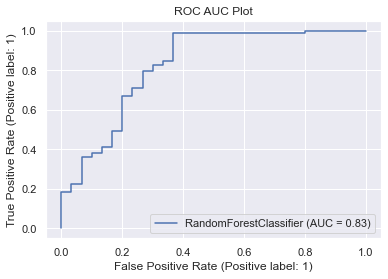

In [77]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(gcv1.best_estimator_,x_test,y_test)
plt.title("ROC AUC Plot")
plt.show()

##### accuracy score=90.55% and auc=83%

# Final Prediction Submission

In [78]:
import numpy as np
a = np.array(y_test)
predicted = np.array(gcv1.best_estimator_.predict(x_test))
df = pd.DataFrame(zip(a,predicted), columns = ["Original","Predicted"])
df

,Original,Predicted
0,1,1
1,1,1
2,1,1
3,0,0
4,1,1
...,...,...
122,1,1
123,1,1
124,1,1
125,1,1


# Saving the best Model

In [79]:
# save the model to disk
import pickle

filename = 'loan_prediction.pkl'
pickle.dump(gcv1.best_estimator_, open(filename, 'wb'))


In [80]:
# load the model from disk

loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(x_test,y_test)
print(result)


0.905511811023622
